<a href="https://colab.research.google.com/github/zlibutmatthew/Stock-Prediction-SVM/blob/master/SVM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prediction 
### Matthew Zlibut

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

## Importing Data from Yahoo

### Data Attributes:
High: The highest price of the day

Low: The lowest price of the day

Open: The opening price of the day

Close: The Closing price of the day

Volume: Amount of stocks traded in the day

Adjusted Close: The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions.

In [2]:
#Get the stock info and store into a dataframe
df = web.DataReader('AAPL', data_source='yahoo', start='2014-10-23', end='2019-12-31')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,26.262501,25.907499,26.0200,26.207500,284298800.0,23.811670
2014-10-24,26.372499,26.132500,26.2950,26.305000,188215600.0,23.900255
2014-10-27,26.370001,26.174999,26.2125,26.277500,136750800.0,23.875267
2014-10-28,26.684999,26.337500,26.3500,26.684999,192243600.0,24.245510
2014-10-29,26.842501,26.590000,26.6625,26.834999,210751600.0,24.381798


In [3]:
'''Nasdaq is a global electronic marketplace for buying and selling securities'''
df_nas = web.DataReader('^IXIC', data_source='yahoo', start='2014-10-23', end='2019-12-31')
df_nas.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,4475.549805,4421.560059,4427.439941,4452.790039,1952380000,4452.790039
2014-10-24,4486.259766,4445.850098,4459.459961,4483.720215,1754300000,4483.720215
2014-10-27,4489.600098,4450.290039,4469.020020,4485.930176,1585580000,4485.930176
2014-10-28,4564.290039,4505.109863,4505.729980,4564.290039,1966920000,4564.290039
2014-10-29,4564.439941,4517.020020,4551.370117,4549.229980,2184050000,4549.229980


In [4]:
'''The DJIA is a price-weighted index that tracks 30 large, publicly-owned companies trading 
on the New York Stock Exchange and the NASDAQ.'''
df_dow = web.DataReader('^DJI', data_source='yahoo', start='2014-10-23', end='2019-12-31')
df_dow.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,16767.519531,16468.070312,16468.070312,16677.900391,99420000,16677.900391
2014-10-24,16811.710938,16649.720703,16677.039062,16805.410156,90400000,16805.410156
2014-10-27,16836.980469,16729.830078,16796.099609,16817.939453,72580000,16817.939453
2014-10-28,17006.449219,16825.189453,16825.189453,17005.750000,83870000,17005.750000
2014-10-29,17065.500000,16895.380859,17005.070312,16974.310547,76450000,16974.310547


In [5]:
'''S&P 500 tracks the top 500 traded stocks'''
df_snp = web.DataReader('^GSPC', data_source='yahoo', start='2014-10-23', end='2019-12-31')
df_snp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,1961.949951,1931.020020,1931.020020,1950.819946,3789250000,1950.819946
2014-10-24,1965.270020,1946.270020,1951.589966,1964.579956,3078380000,1964.579956
2014-10-27,1964.640015,1951.369995,1962.969971,1961.630005,3538860000,1961.630005
2014-10-28,1985.050049,1964.140015,1964.140015,1985.050049,3653260000,1985.050049
2014-10-29,1991.400024,1969.040039,1983.290039,1982.300049,3740350000,1982.300049


In [6]:
'''The Nikkei is short for Japan's Nikkei 225 Stock Average, the leading and most-respected index of Japanese stocks.'''
df_nik = web.DataReader('^N225', data_source='yahoo', start='2014-10-23', end='2019-12-31')
df_nik.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,15232.509766,15059.639648,15093.780273,15138.959961,119600.0,15138.959961
2014-10-24,15377.049805,15232.000000,15354.349609,15291.639648,121800.0,15291.639648
2014-10-27,15424.049805,15333.709961,15404.280273,15388.719727,121000.0,15388.719727
2014-10-28,15374.459961,15263.360352,15363.280273,15329.910156,122300.0,15329.910156
2014-10-29,15595.290039,15394.790039,15442.389648,15553.910156,148800.0,15553.910156


In [7]:
'''The Hang Seng Index (HSI) is a freefloat-adjusted market-capitalization-weighted stock-market index in Hong Kong.'''
df_hsi = web.DataReader('^HSI', data_source='yahoo', start='2014-10-23', end='2019-12-31')
df_hsi.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,23397.169922,23221.689453,23296.000000,23333.179688,1.038978e+09,23333.179688
2014-10-24,23352.589844,23157.480469,23311.880859,23302.199219,1.201348e+09,23302.199219
2014-10-27,23275.400391,23012.800781,23275.400391,23143.230469,1.229645e+09,23143.230469
2014-10-28,23570.919922,23189.830078,23189.830078,23520.359375,1.889125e+09,23520.359375
2014-10-29,23855.669922,23699.560547,23703.949219,23819.869141,2.017536e+09,23819.869141


In [8]:
'''The DAX—also known as the Deutscher Aktien Index—is a stock index that represents 30 of the largest and most 
liquid German companies that trade on the Frankfurt Exchange.'''
df_dax = web.DataReader('DAX', data_source='yahoo', start='2014-10-23', end='2019-12-31')
df_dax.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,25.270000,25.090000,25.090000,25.250000,7400.0,22.448982
2014-10-24,25.190001,25.139999,25.139999,25.190001,15200.0,22.395638
2014-10-27,25.028000,25.028000,25.028000,25.028000,300.0,22.251610
2014-10-28,25.510000,25.440001,25.440001,25.510000,3800.0,22.680141
2014-10-29,25.670000,25.660000,25.660000,25.670000,13600.0,22.822393


In [9]:
'''Crude Oil'''
df_oil = web.DataReader('CL=F', data_source='yahoo', start='2014-10-23', end='2019-12-31')
df_oil.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,82.370003,80.050003,80.419998,82.089996,354839.0,82.089996
2014-10-24,81.949997,80.360001,81.949997,81.010002,272509.0,81.010002
2014-10-27,81.290001,79.440002,81.269997,81.000000,285327.0,81.000000
2014-10-28,81.660004,80.360001,80.639999,81.419998,226066.0,81.419998
2014-10-29,82.879997,81.440002,81.550003,82.199997,283762.0,82.199997


In [10]:
'''Gold Index'''
df_gold = web.DataReader('XAU=F', data_source='yahoo', start='2014-10-23', end='2019-12-31')
df_gold.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,445.500000,441.299988,444.100006,442.700012,321.0,442.700012
2014-10-24,448.200012,443.799988,444.399994,447.200012,34.0,447.200012
2014-10-27,448.600006,445.299988,447.100006,446.299988,80.0,446.299988
2014-10-28,449.100006,444.100006,447.399994,449.100006,353.0,449.100006
2014-10-29,450.799988,442.299988,449.500000,446.500000,213.0,446.500000


## Preprocessing

In [11]:
df = df.reset_index() 
df_nas = df_nas.reset_index() 
df_dow=df_dow.reset_index()
df_snp=df_snp.reset_index() 
df_dax=df_dax.reset_index() 
df_hsi=df_hsi.reset_index()
df_nik=df_nik.reset_index()
df_oil=df_oil.reset_index()
df_gold=df_gold.reset_index()

In [12]:
print(len(df), len(df_nas), len(df_dow), len(df_snp), len(df_dax), len(df_hsi), len(df_nik), len(df_oil), len(df_gold))

1306 1306 1306 1306 1306 1278 1270 1294 1294


In [13]:
df = df[:1270] 
df_nas = df_nas[:1270]
df_dow=df_dow[:1270]
df_snp=df_snp[:1270] 
df_dax=df_dax[:1270]
df_hsi=df_hsi[:1270]
df_nik=df_nik[:1270]
df_oil=df_oil[:1270]
df_gold=df_gold[:1270]

In [14]:
df.shape, df_nas.shape, df_dow.shape, df_snp.shape, df_dax.shape, df_hsi.shape, df_nik.shape, df_oil.shape, df_gold.shape

((1270, 7),
 (1270, 7),
 (1270, 7),
 (1270, 7),
 (1270, 7),
 (1270, 7),
 (1270, 7),
 (1270, 7),
 (1270, 7))

In [15]:
adj_close = pd.concat([df_nas['Adj Close'], df_dow['Adj Close'], df_snp['Adj Close'], df_dax['Adj Close'], df_hsi['Adj Close'], df_nik['Adj Close'], df_oil['Adj Close'], df_gold['Adj Close']], axis=1)

In [16]:
adj_close.isna().sum()

Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
dtype: int64

In [17]:
adj_close = adj_close.values
adj_close

array([[ 4452.79003906, 16677.90039062,  1950.81994629, ...,
        15138.95996094,    82.08999634,   442.70001221],
       [ 4483.72021484, 16805.41015625,  1964.57995605, ...,
        15291.63964844,    81.01000214,   447.20001221],
       [ 4485.93017578, 16817.93945312,  1961.63000488, ...,
        15388.71972656,    81.        ,   446.29998779],
       ...,
       [ 8434.6796875 , 27492.63085938,  3074.62011719, ...,
        23924.91992188,    55.20999908,   632.09997559],
       [ 8410.62988281, 27492.56054688,  3076.7800293 , ...,
        23837.72070312,    57.11000061,   636.09997559],
       [ 8434.51953125, 27674.80078125,  3085.17993164, ...,
        23656.61914062,    58.58000183,   633.70001221]])

In [18]:
adj_close.shape

(1270, 8)

In [19]:
appl = df['Adj Close']
appl = appl.values
print(len(appl))
appl

1270


array([23.8116703 , 23.9002552 , 23.87526703, ..., 63.65097046,
       63.67819214, 64.41311646])

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(adj_close)
scaled_data

array([[0.04461548, 0.08470685, 0.09691903, ..., 0.020061  , 0.99803535,
        0.13006141],
       [0.05203664, 0.09531973, 0.10787358, ..., 0.0364454 , 0.9787463 ,
        0.14846631],
       [0.05256688, 0.09636257, 0.10552508, ..., 0.04686329, 0.97856766,
        0.14478523],
       ...,
       [1.        , 0.98483765, 0.99159317, ..., 0.96290223, 0.51794965,
        0.90470329],
       [0.99422967, 0.9848318 , 0.99331271, ..., 0.95354469, 0.55188431,
        0.9210632 ],
       [0.99996157, 1.        , 1.        , ..., 0.93411027, 0.57813902,
        0.9112474 ]])

In [21]:
#create training dataset
X = scaled_data
y = appl
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.25,
                     random_state=1)

In [22]:
print(X_train.shape)
print(len(y_train))

(952, 8)
952


In [23]:
print(X_test.shape)
print(len(y_test))

(318, 8)
318


### Support Vector Regression

In [24]:
#linear kernel
lin_svr = SVR(kernel='linear', C=0.1)
lin_svr.fit(X_train, y_train)

# polynomial kernel
poly_svr = SVR(kernel='poly', degree = 1)
poly_svr.fit(X_train, y_train)

# #rbf kernel
rbf_svr = SVR(kernel='rbf', gamma=0.15)
rbf_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
print('linear train',lin_svr.score(X_train, y_train))
print('linear test',lin_svr.score(X_test, y_test))

print('poly train', poly_svr.score(X_train, y_train))
print('poly test', poly_svr.score(X_test, y_test))

print('rbf train', rbf_svr.score(X_train, y_train))
print('rbf test',rbf_svr.score(X_test, y_test))

linear train 0.9093552050999227
linear test 0.910450269360464
poly train 0.9511913094395184
poly test 0.9494936583748315
rbf train 0.9454464222165856
rbf test 0.945064068015088


In [26]:
day_count=[]
for i in range(1, 1271):
    day_count.append(i)
day_count[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Plotting the Model

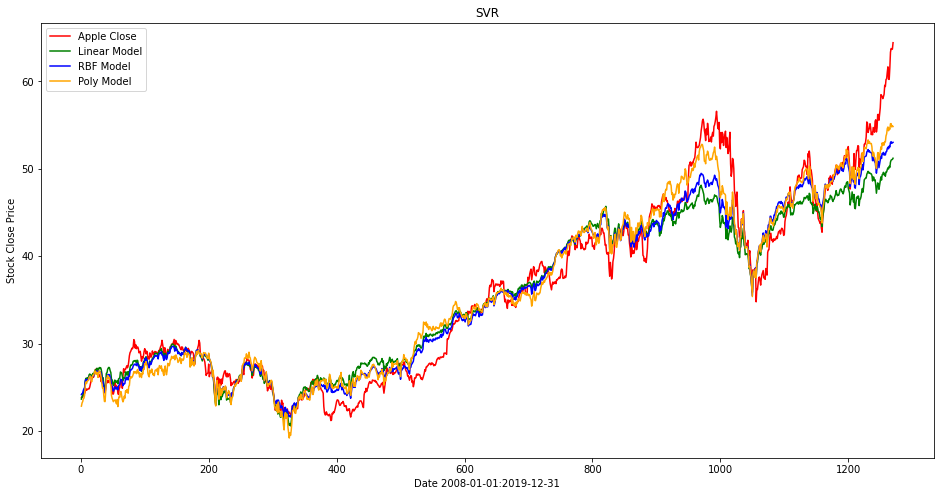

In [27]:
plt.figure(figsize=(16,8))
plt.title('SVR')
plt.plot(day_count, y, color='red',label='Apple Close')
plt.plot(day_count, lin_svr.predict(X), color='green', label='Linear Model')
plt.plot(day_count, rbf_svr.predict(X), color='blue', label='RBF Model')
plt.plot(day_count, poly_svr.predict(X), color='orange', label='Poly Model')
plt.xlabel('Date 2008-01-01:2019-12-31')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()

## Predicting Stocks Post-2020

In [28]:
future_days=[]
for i in range(1271, 1414):
    future_days.append(i)
print(len(future_days))
future_days[:10]

143


[1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280]

In [29]:
df_appl_f = web.DataReader('AAPL', data_source='yahoo', start='2020-01-01', end='2020-12-31')
# df_appl_f.head()
df_nas_f = web.DataReader('^IXIC', data_source='yahoo', start='2020-01-01', end='2020-12-31')
# df_nas_f.head()
df_dow_f = web.DataReader('^DJI', data_source='yahoo', start='2020-01-01', end='2020-12-31')
# df_dow_f.head()
df_snp_f = web.DataReader('^GSPC', data_source='yahoo', start='2020-01-01', end='2020-12-31')
# df_snp_f.head()
df_nik_f = web.DataReader('^N225', data_source='yahoo', start='2020-01-01', end='2020-12-31')
# df_nik.head()
df_hsi_f = web.DataReader('^HSI', data_source='yahoo', start='2020-01-01', end='2020-12-31')
# df_hsi.head()
df_dax_f = web.DataReader('DAX', data_source='yahoo', start='2020-01-01', end='2020-12-31')
# df_dax_f.head()
df_oil_f = web.DataReader('CL=F', data_source='yahoo', start='2020-01-01', end='2020-12-31')
# df_oil.head()
df_gold_f = web.DataReader('XAU=F', data_source='yahoo', start='2020-01-01', end='2020-12-31')
# df_gold.head()

In [30]:
df_appl_f=df_appl_f.dropna()
df_nas_f=df_nas_f.dropna()
df_dow_f=df_dow_f.dropna()
df_snp_f=df_snp_f.dropna()
df_nik_f=df_nik_f.dropna()
df_hsi_f=df_hsi_f.dropna()
df_dax_f=df_dax_f.dropna()
df_oil_f=df_oil_f.dropna()
df_gold_f=df_gold_f.dropna()

In [31]:
df_appl_f.shape, df_nas_f.shape, df_dow_f.shape, df_snp_f.shape, df_nik_f.shape, df_hsi_f.shape, df_dax_f.shape, df_oil_f.shape, df_gold_f.shape

((203, 6),
 (203, 6),
 (203, 6),
 (203, 6),
 (194, 6),
 (198, 6),
 (203, 6),
 (234, 6),
 (203, 6))

In [32]:
df_appl_f = df_appl_f[:193]
df_nas_f = df_nas_f[:193]
df_dow_f = df_dow_f[:193]
df_snp_f = df_snp_f[:193]
df_nik_f = df_nik_f[:193]
df_hsi_f = df_hsi_f[:193]
df_dax_f = df_dax_f[:193]
df_oil_f = df_oil_f[:193]
df_gold_f = df_gold_f[:193]

In [33]:
appl_df_f = df_appl_f['Adj Close']
appl_f = appl_df_f.values
appl_f = appl_f[:143]
appl_f[:10]

array([74.57303619, 73.84803009, 74.43647003, 74.08639526, 75.2781601 ,
       76.87713623, 77.05092621, 78.69707489, 77.63440704, 77.30170441])

In [34]:
future_df = pd.concat([df_nas_f['Adj Close'], df_dow_f['Adj Close'], df_snp_f['Adj Close'], df_dax_f['Adj Close'], df_hsi_f['Adj Close'], df_nik_f['Adj Close'], df_oil_f['Adj Close'], df_gold_f['Adj Close']], axis=1)
future_df = future_df.dropna()
print(future_df.isna().sum())
future_arr = future_df.values
# future_arr

Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
dtype: int64


In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_f = scaler.fit_transform(future_arr)
scaled_data_f

array([[0.48921784, 0.92262057, 0.84504307, ..., 0.88830764, 1.        ,
        0.73694242],
       [0.48857841, 0.91169843, 0.83742078, ..., 0.93783222, 0.99435085,
        0.73122378],
       [0.50200162, 0.92642632, 0.85071367, ..., 0.88829434, 0.96372646,
        0.73084263],
       ...,
       [0.97460317, 0.83469218, 0.9616628 , ..., 0.84500881, 0.79494551,
        0.54937111],
       [0.98497031, 0.85208346, 0.97142082, ..., 0.85030787, 0.7925669 ,
        0.55203963],
       [1.        , 0.88658606, 1.        , ..., 0.85901584, 0.79534191,
        0.57072062]])

## Plotting the Model

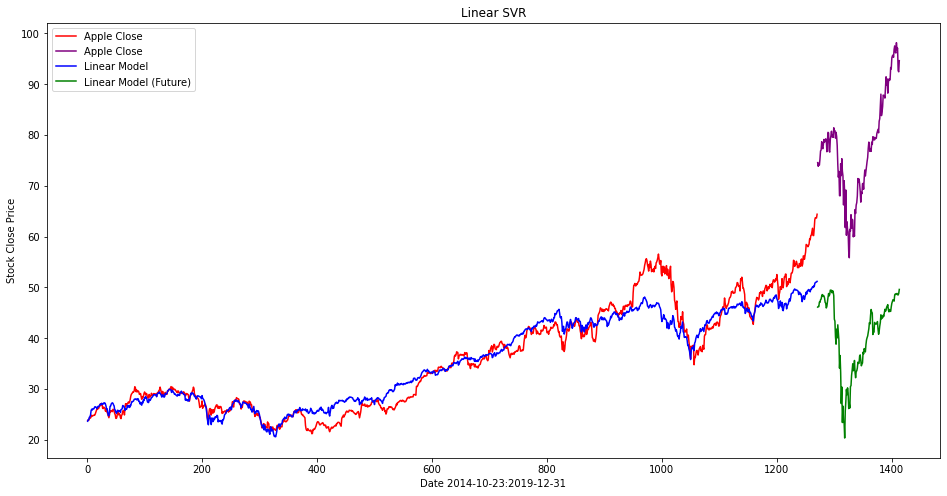

In [36]:
plt.figure(figsize=(16,8))
plt.title('Linear SVR')
plt.plot(day_count, y, color='red',label='Apple Close')
plt.plot(future_days, appl_f, color='purple', label='Apple Close')
plt.plot(day_count, lin_svr.predict(X), color='blue', label='Linear Model')
plt.plot(future_days, lin_svr.predict(scaled_data_f), color='green', label='Linear Model (Future)')
plt.xlabel('Date 2014-10-23:2019-12-31')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()

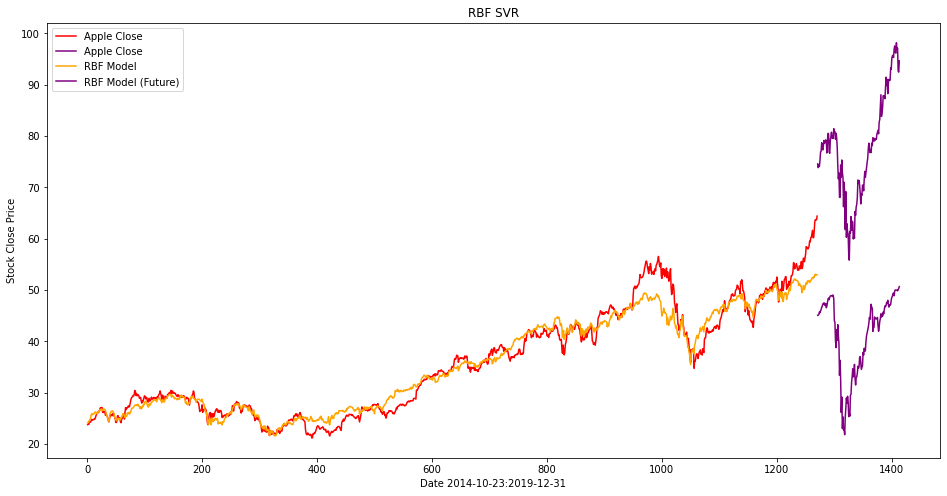

In [37]:
plt.figure(figsize=(16,8))
plt.title('RBF SVR')
plt.plot(day_count, y, color='red',label='Apple Close')
plt.plot(future_days, appl_f, color='purple', label='Apple Close')
plt.plot(day_count, rbf_svr.predict(X), color='orange', label='RBF Model')
plt.plot(future_days, rbf_svr.predict(scaled_data_f), color='purple', label='RBF Model (Future)')
plt.xlabel('Date 2014-10-23:2019-12-31')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()

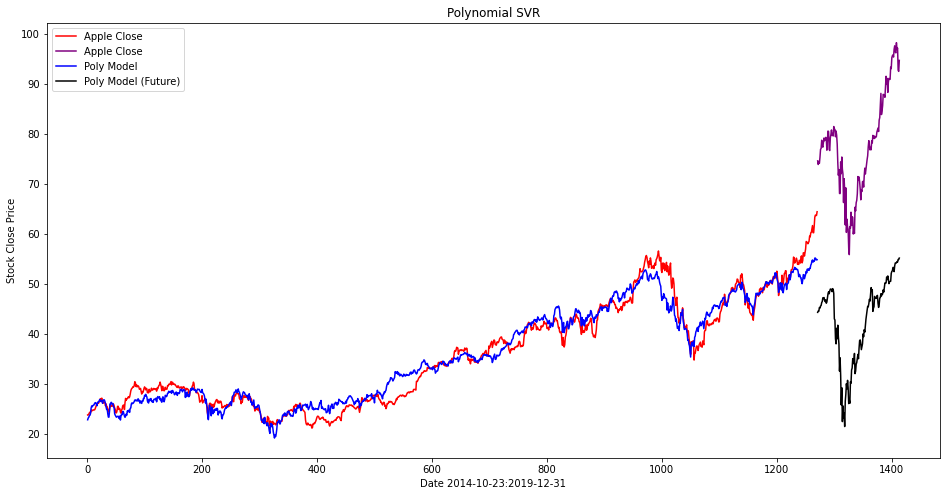

In [38]:
plt.figure(figsize=(16,8))
plt.title('Polynomial SVR')
plt.plot(day_count, y, color='red',label='Apple Close')
plt.plot(future_days, appl_f, color='purple', label='Apple Close')
plt.plot(day_count, poly_svr.predict(X), color='blue', label='Poly Model')
plt.plot(future_days, poly_svr.predict(scaled_data_f), color='black', label='Poly Model (Future)')
plt.xlabel('Date 2014-10-23:2019-12-31')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()